## Setup notebook

In [255]:
from google.colab import drive
drive.mount('/content/drive')

drive_dir = '/content/drive/MyDrive/GSA-Lab/EuroDigitale/Replication Package/SurveryDigitalEuroComplete_Shared.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Define DataFrame and preprocessing operations

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3
from matplotlib.patches import Circle

data = pd.read_csv(drive_dir)

# Settings heatmap
plt.rcParams.update({'font.size': 15})

# Rename used columns and recategorize ages in English
data.rename(columns={'Età': 'Gen',
                     'Titolo di studio': 'Level',
                     'Occupazione': 'Occupation',
                     'Sei a conoscenza del progetto Euro Digitale?': 'Do you know Digital Euro Project?',
                     'Conosci le criptovalute?': 'Do you know Cryptocurrencies?',
                     'Quanto ti identifichi in quanto appena letto?': 'How much do you identify with what you just read?',
                     'Quanto sei favorevole con quanto appena letto?': 'How supportive are you with what you just read?',
                     'Se potessi sapere chiaramente come lo Stato utilizza ogni singolo euro delle TUE tasse, come sarebbe la tua opinione rispetto alla risposta precedente?': 'If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?'
                     }, inplace=True)

# Defining syntetized question string
age_question = 'Gen'
level_question = 'Level'
occupation_question = 'Occupation'
know_digital_euro_question = 'Do you know Digital Euro Project?'
know_cryptocurrencies_question = 'Do you know Cryptocurrencies?'
identify_question = 'How much do you identify with what you just read?'
supportive_question = 'How supportive are you with what you just read?'
changing_opinion_question = 'If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?'


age_mapping = {
    '10 - 25 anni': 'Gen Z',
    '26 - 41 anni': 'Gen Y',
    '42 - 57 anni': 'Gen X',
    '58 - 76 anni': 'Baby boomers',
    '77+ anni': 'Silent generation'
}
data['Gen'] = data['Gen'].replace(age_mapping)

level_mapping = {
    "Diploma di scuola superiore": "High school",
    "Licenza media": "Middle school",
    "Dottorato": "PhD",
    "Laurea": "Bachelor/master degree",
    "Master": "Post-graduate masters"
}
data['Level'] = data['Level'].replace(level_mapping)

# Map specific Italian occupations to English equivalents
data['Occupation'] = data['Occupation'].replace({
    'Quadro': 'Dirigente',
    'Libero professionista': 'Lavoratore autonomo',
    'Lavoratore in proprio': 'Lavoratore autonomo'
    })

occupations_of_interest = {
    "Impiegato, operaio, addetto": "Employee, worker, attendant",
    "Studente": "Student",
    "Dirigente": "Executive",
    "Docente": "Teacher",
    "Lavoratore autonomo": "Freelancer",
    "Imprenditore": "Administrator",
    "Pensionato": "Retired",
    "Disoccupato": "Unemployed"
}

data['Occupation'] = data['Occupation'].apply(lambda x: occupations_of_interest.get(x, 'Other'))

agreement_level_mapping = {
    'Molto': 'Very',
    'Abbastanza': 'Quite',
    'Poco': 'Little',
    'Per niente': 'Any'
}

opinion_mapping = {
    'Molto favorevole' : 'Very favourable',
    'Abbastanza favorevole' : 'Favourable',
    'Indifferente' : 'No opinion',
    'Sfavorevole' : 'Unfavourable',
    'Molto sfavorevole' : 'Very unfavourable'
}

adoption_mapping = {
    'Sarei più favorevole' : 'I would be more favourable',
    'La mia opinione non cambia' : 'My opinion does not change'
}

data[changing_opinion_question] = data[changing_opinion_question].replace(adoption_mapping)
data[supportive_question] = data[supportive_question].replace(opinion_mapping)
data[identify_question] = data[identify_question].replace(agreement_level_mapping)

# Defining order for charts representation
gen_order = ['Gen Z', 'Gen Y', 'Gen X', 'Baby boomers', 'Silent generation']
occ_order = ['Student', 'Teacher', 'Employee, worker, attendant', 'Freelancer', 'Executive', 'Administrator', 'Retired', 'Unemployed', 'Other']
lev_order = ['Middle school', 'High school', 'Bachelor/master degree', 'Post-graduate masters', 'PhD']
opinion_order = ['Very favourable', 'Favourable', 'No opinion', 'Unfavourable', 'Very unfavourable']
adoption_order =['I would be more favourable', 'My opinion does not change']
agreement_order = ['Very', 'Quite', 'Little', 'Any']


In [257]:
data

,Informazioni cronologiche,Gen,Genere,Occupation,Settore,Level,Do you know Digital Euro Project?,Do you know Cryptocurrencies?,How much do you identify with what you just read?,How supportive are you with what you just read?,"If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?","Se potessi sapere chiaramente come lo Stato utilizza ogni singolo euro delle TUE tasse, saresti più d'accordo nel pagare le tasse?",Che tipo di funzionalità ti aspetti da un sistema come questo?,Cosa ti spaventerebbe/quali sono le tue preoccupazioni riguardo l’utilizzo di questo sistema?
0,02/11/2023 8.21.42,Gen Y,Donna,Freelancer,Servizi socio-sanitari,Post-graduate masters,Si,Si,Quite,No opinion,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che le mie informazioni possano esser...
1,02/11/2023 15.31.01,Gen Y,Donna,Freelancer,"Comunicazione, pubblicità e pubbliche relazioni",Bachelor/master degree,Si,Si,Very,Very favourable,My opinion does not change,Si,Permettere anche alle imprese terze di parteci...,Ho paura che la mia privacy venga violata
2,03/11/2023 9.17.37,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Post-graduate masters,Si,Si e ne posseggo alcune,Very,Very favourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che la mia privacy venga violata
3,03/11/2023 9.18.35,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si e ne posseggo alcune,Very,Very favourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,"Ho paura di subire furti di denaro, Ho paura c..."
4,03/11/2023 9.24.59,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si e ne posseggo alcune,Very,Favourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,Ho paura che la mia privacy venga violata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,06/11/2023 22.03.58,Gen X,Uomo,"Employee, worker, attendant",Edilizia ed impiantistica,Bachelor/master degree,No,No,Little,No opinion,My opinion does not change,No,Tracciabilità delle donazioni alle associazion...,Ho paura di poter essere truffato in qualche modo
347,06/11/2023 22.39.47,Gen Y,Donna,Other,"Agricoltura, zootecnia, silvicoltura e pesca",PhD,No,Si,Very,Very unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."
348,06/11/2023 23.25.37,Gen Y,Uomo,Other,Informatica,Bachelor/master degree,No,Si,Very,Unfavourable,My opinion does not change,Si,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."
349,07/11/2023 7.17.53,Gen Y,Uomo,"Employee, worker, attendant",Informatica,High school,No,Si,Quite,Favourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."


In [258]:
occupation_counts = data['Occupation'].value_counts()
occupation_counts.sum()

351

In [259]:
generation_count = data['Gen'].value_counts()
generation_count

Gen
Gen Y                163
Gen Z                 80
Gen X                 76
Baby boomers          31
Silent generation      1
Name: count, dtype: int64

# Figure 6. Distribution of participants

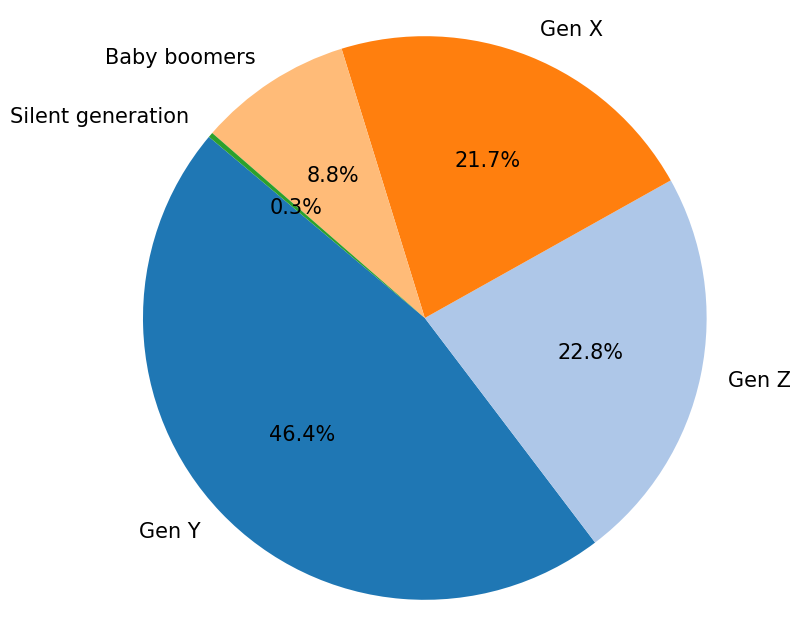

In [260]:
# Pie Chart Generation
plt.figure(figsize=(8, 8))
plt.pie(generation_count, labels=generation_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.axis('equal')
plt.show()

# Figure 7. Histogram Occupation

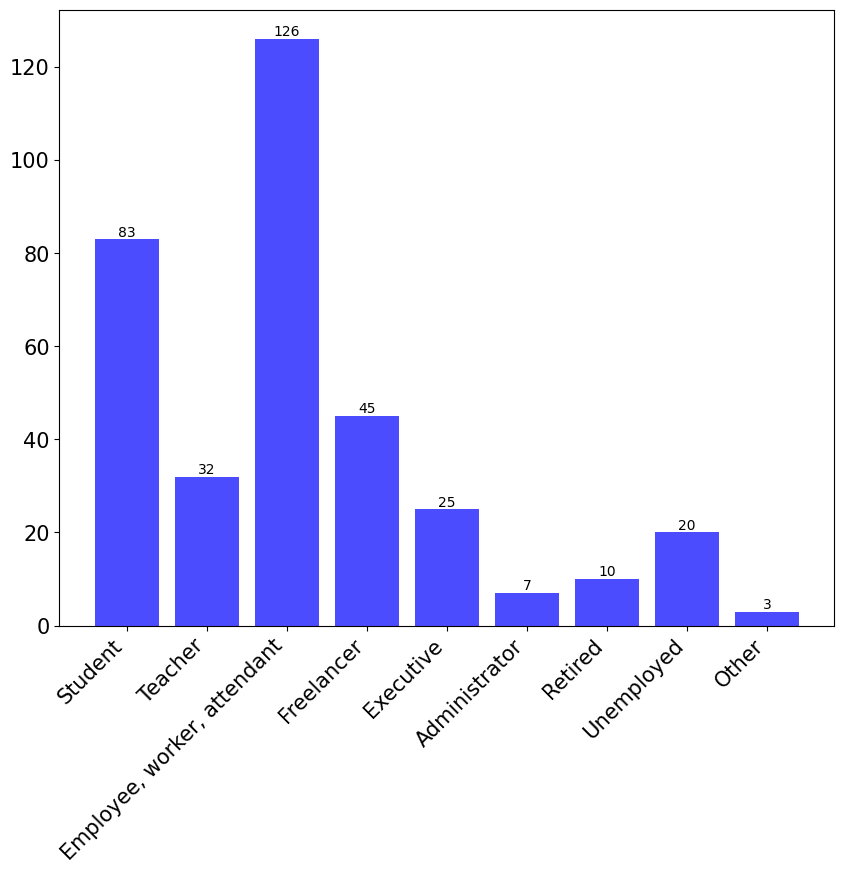

In [261]:
# Occurences
occupation_counts_ordered = occupation_counts.reindex(occ_order)
plt.figure(figsize=(10, 8))
bars = plt.bar(occupation_counts_ordered.index, occupation_counts_ordered.values, color='blue', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Adding number of occurrences in plt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)


plt.show()

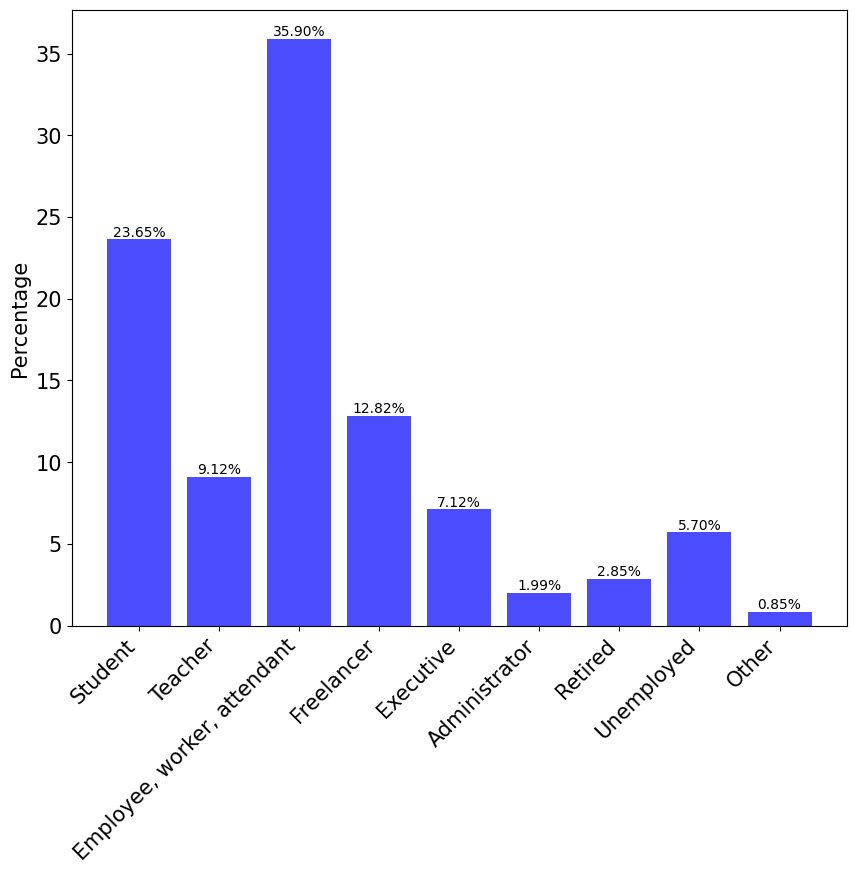

In [348]:
# Percentage
occupation_counts_ordered = occupation_counts.reindex(occ_order)
total_occupation_counts = occupation_counts_ordered.sum()
occupation_percentages = (occupation_counts_ordered / total_occupation_counts) * 100


plt.figure(figsize=(10, 8))
bars = plt.bar(occupation_percentages.index, occupation_percentages.values, color='blue', alpha=0.7)

plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Adding number of occurrences in plt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)


plt.show()

# Figure 8. Histogram of Education Level

In [263]:
level_counts = data['Level'].value_counts()
level_counts

Level
Bachelor/master degree    147
High school               115
Post-graduate masters      47
Middle school              28
PhD                        14
Name: count, dtype: int64

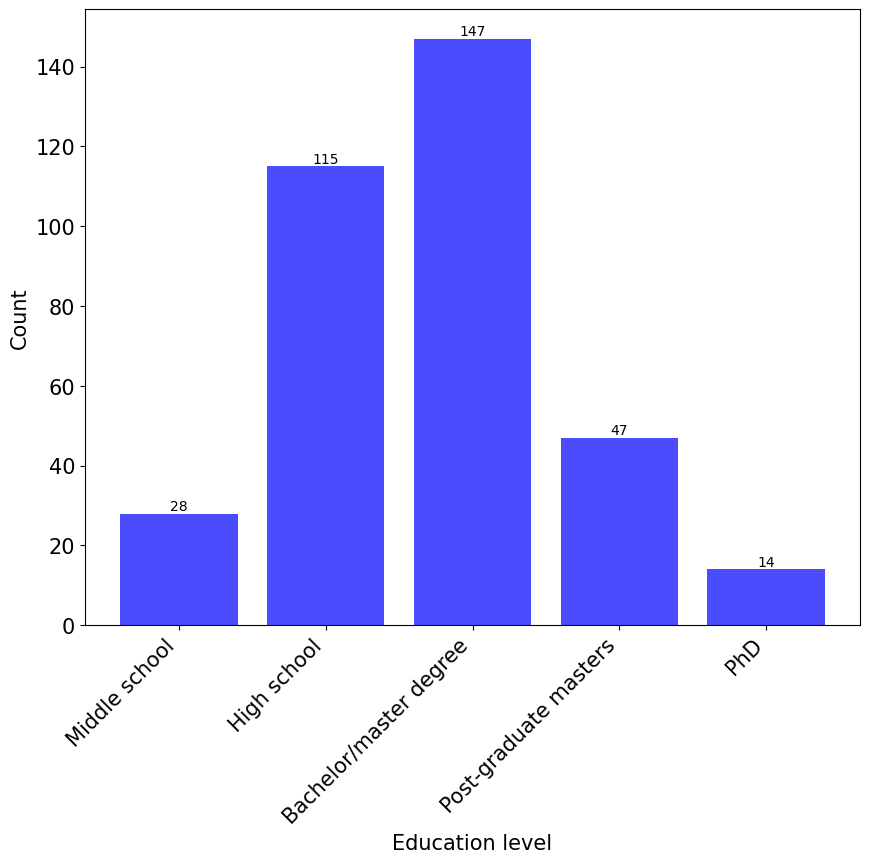

In [264]:
level_counts_ordered = level_counts.reindex(lev_order)

plt.figure(figsize=(10, 8))
bars = plt.bar(level_counts_ordered.index, level_counts_ordered.values, color='blue', alpha=0.7)

plt.xlabel('Education level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adding number of occurrences in plt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)


plt.show()

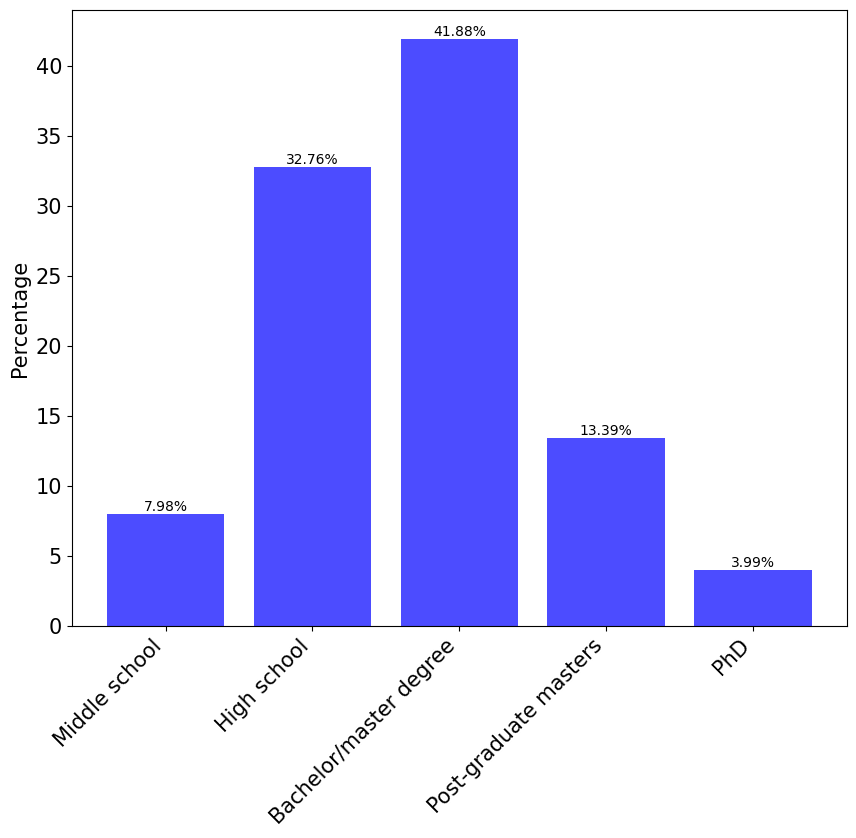

In [344]:
# Percentage
level_counts_ordered = level_counts.reindex(lev_order)
total_level_counts = level_counts_ordered.sum()
level_percentages = (level_counts_ordered / total_level_counts) * 100


plt.figure(figsize=(10, 8))
bars = plt.bar(level_percentages.index, level_percentages.values, color='blue', alpha=0.7)

plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Adding number of occurrences in plt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)


plt.show()

# Figure 9. Knowledge of Digital Euro and Cryptocurrencies

In [266]:
data

,Informazioni cronologiche,Gen,Genere,Occupation,Settore,Level,Do you know Digital Euro Project?,Do you know Cryptocurrencies?,How much do you identify with what you just read?,How supportive are you with what you just read?,"If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?","Se potessi sapere chiaramente come lo Stato utilizza ogni singolo euro delle TUE tasse, saresti più d'accordo nel pagare le tasse?",Che tipo di funzionalità ti aspetti da un sistema come questo?,Cosa ti spaventerebbe/quali sono le tue preoccupazioni riguardo l’utilizzo di questo sistema?
0,02/11/2023 8.21.42,Gen Y,Donna,Freelancer,Servizi socio-sanitari,Post-graduate masters,Si,Si,Quite,No opinion,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che le mie informazioni possano esser...
1,02/11/2023 15.31.01,Gen Y,Donna,Freelancer,"Comunicazione, pubblicità e pubbliche relazioni",Bachelor/master degree,Si,Si,Very,Very favourable,My opinion does not change,Si,Permettere anche alle imprese terze di parteci...,Ho paura che la mia privacy venga violata
2,03/11/2023 9.17.37,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Post-graduate masters,Si,Si e ne posseggo alcune,Very,Very favourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che la mia privacy venga violata
3,03/11/2023 9.18.35,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si e ne posseggo alcune,Very,Very favourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,"Ho paura di subire furti di denaro, Ho paura c..."
4,03/11/2023 9.24.59,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si e ne posseggo alcune,Very,Favourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,Ho paura che la mia privacy venga violata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,06/11/2023 22.03.58,Gen X,Uomo,"Employee, worker, attendant",Edilizia ed impiantistica,Bachelor/master degree,No,No,Little,No opinion,My opinion does not change,No,Tracciabilità delle donazioni alle associazion...,Ho paura di poter essere truffato in qualche modo
347,06/11/2023 22.39.47,Gen Y,Donna,Other,"Agricoltura, zootecnia, silvicoltura e pesca",PhD,No,Si,Very,Very unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."
348,06/11/2023 23.25.37,Gen Y,Uomo,Other,Informatica,Bachelor/master degree,No,Si,Very,Unfavourable,My opinion does not change,Si,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."
349,07/11/2023 7.17.53,Gen Y,Uomo,"Employee, worker, attendant",Informatica,High school,No,Si,Quite,Favourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."


In [267]:
total= len(data)

In [268]:
group_only_digital_euro = data[(data[know_digital_euro_question] == 'Si') & (data[know_cryptocurrencies_question].isin(['No']))]
len(group_only_digital_euro)

5

In [269]:
group_only_crypto = data[data[know_cryptocurrencies_question].isin(['Si', 'Si e ne posseggo alcune']) & (data[know_digital_euro_question] == 'No')]
len(group_only_crypto)

191

In [270]:
intersection = data[(data[know_digital_euro_question] == 'Si') & (data[know_cryptocurrencies_question].isin(['Si', 'Si e ne posseggo alcune']))]
len(intersection)

87

In [271]:
neither_of_them = data[(data[know_digital_euro_question] == 'No') & (data[know_cryptocurrencies_question].isin(['No']))]
len(neither_of_them)

68

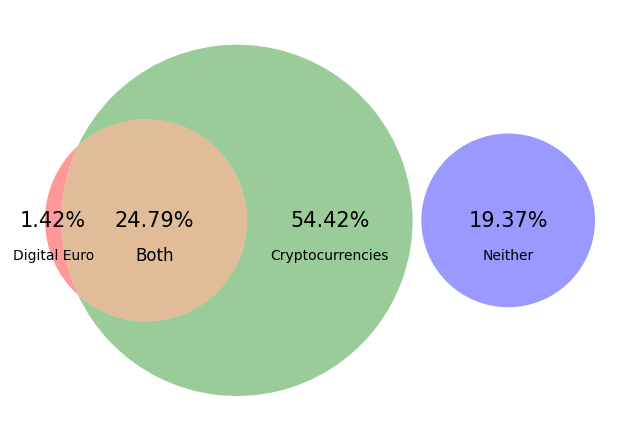

In [272]:
num_euro_digital = round(len(group_only_digital_euro)/total*100,2)
num_crypto = round(len(group_only_crypto)/total*100,2)
num_intersection = round(len(intersection)/total*100,2)
num_neither = round(len(neither_of_them)/total*100,2)

plt.figure(figsize=(8, 8))
venn_diagram= venn3(subsets=(num_euro_digital, num_crypto, num_intersection, num_neither, 0, 0, 0), set_labels=(None, None, None))

venn_diagram.get_label_by_id('100').set_text(f'{num_euro_digital}%')
venn_diagram.get_label_by_id('010').set_text(f'{num_crypto}%')
venn_diagram.get_label_by_id('110').set_text(f'{num_intersection}%')
venn_diagram.get_label_by_id('001').set_text(f'{num_neither}%')

x, y = venn_diagram.get_label_by_id('110').get_position()
plt.text(x, y - 0.10, 'Both', ha='center', va='center', fontsize=12)

x0, y0 = venn_diagram.get_label_by_id('100').get_position()
plt.text(x0, y0 - 0.10, 'Digital Euro', ha='center', va='center', fontsize=10)

x1, y1 = venn_diagram.get_label_by_id('010').get_position()
plt.text(x1, y1 - 0.10, 'Cryptocurrencies', ha='center', va='center', fontsize=10)


x2, y2 = venn_diagram.get_label_by_id('001').get_position()
plt.text(x2, y2 - 0.10, 'Neither', ha='center', va='center', fontsize=10)

plt.show()


# Figure 10. Histogram citizens and taxes

Citizens are required to pay taxes but very often do not find a match between what they pay to the state and the services that the state itself provides to the citizen. How much do you identify with what you just read?

In [273]:
taxes_match_data= data[identify_question]

responses_counts = taxes_match_data.value_counts()
responses_counts_ordered= responses_counts.reindex(agreement_order)
responses_counts_ordered

How much do you identify with what you just read?
Very      141
Quite     171
Little     37
Any         2
Name: count, dtype: int64

In [274]:
taxes_match_data

0       Quite
1        Very
2        Very
3        Very
4        Very
        ...  
346    Little
347      Very
348      Very
349     Quite
350     Quite
Name: How much do you identify with what you just read?, Length: 351, dtype: object

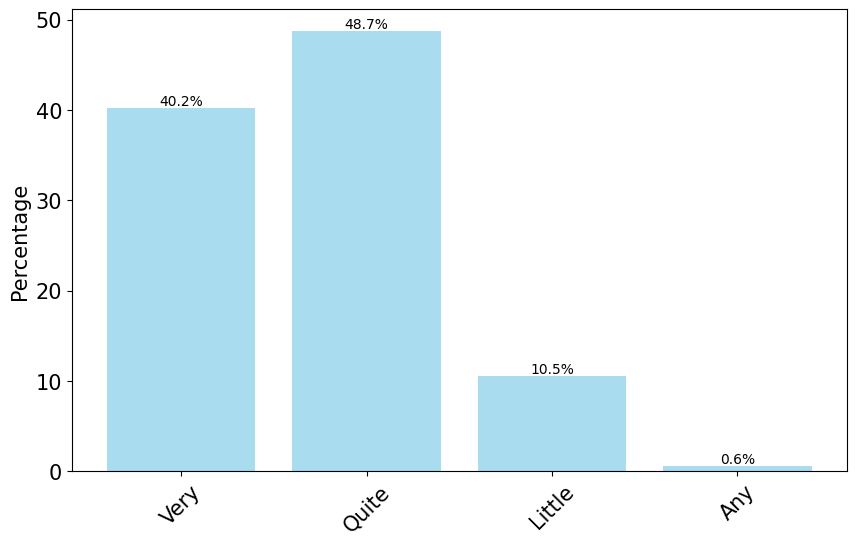

In [275]:
total_count_citizens = responses_counts_ordered.sum()

responses_counts_ordered_percentage = (responses_counts_ordered / total_count_citizens)*100

plt.figure(figsize=(10, 6))
bars = plt.bar(responses_counts_ordered_percentage.index, responses_counts_ordered_percentage.values, color='skyblue', alpha=0.7)

plt.ylabel('Percentage')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

# Define Unfavorable and No opinion DataFrame By Gen, Occupation and Education Level

In [276]:
unfavorable_data = data[data[supportive_question].isin(["Unfavourable", "Very unfavourable"])]
unfavorable_count = len(unfavorable_data)
print("Number of Unfavorable responses:", unfavorable_count)

Number of Unfavorable responses: 107


In [277]:
no_opinion_data = data[data[supportive_question].isin(["No opinion"])]
no_opinion_count = len(no_opinion_data)
print("Number of No opinion responses:", no_opinion_count)

Number of No opinion responses: 62


In [278]:
# Define unfavorable data
unfavorable_counts = unfavorable_data.groupby(["Gen", "Occupation", "Level"]).size().reset_index(name='Number of Unfavorable')

unfavorable_counts_gen_occ = unfavorable_data.groupby(["Gen", "Occupation"]).size().reset_index(name='Number of Unfavorable')
unfavorable_counts_gen_lev = unfavorable_data.groupby(["Gen", "Level"]).size().reset_index(name='Number of Unfavorable')

# Reorder unfavorable data
unfavorable_counts_gen_occ = unfavorable_data.groupby(["Gen", "Occupation"]).size().unstack().reindex(gen_order)
unfavorable_counts_gen_occ = unfavorable_counts_gen_occ[occ_order]

unfavorable_counts_gen_lev = unfavorable_data.groupby(["Gen", "Level"]).size().unstack().reindex(gen_order)
unfavorable_counts_gen_lev = unfavorable_counts_gen_lev[lev_order]

# Define no opinion data
no_opinion_counts = no_opinion_data.groupby(["Gen", "Occupation", "Level"]).size().reset_index(name='Number of No opinion')

no_opinion_counts_gen_occ = no_opinion_data.groupby(["Gen", "Occupation"]).size().reset_index(name='Number of No opinion')
no_opinion_counts_gen_lev = no_opinion_data.groupby(["Gen", "Level"]).size().reset_index(name='Number of No opinion')

# Reorder no opinion data
no_opinion_counts_gen_occ = no_opinion_data.groupby(["Gen", "Occupation"]).size().unstack().reindex(gen_order)
no_opinion_counts_gen_occ = no_opinion_counts_gen_occ[occ_order]

no_opinion_counts_gen_lev = no_opinion_data.groupby(["Gen", "Level"]).size().unstack().reindex(gen_order)
no_opinion_counts_gen_lev = no_opinion_counts_gen_lev[lev_order]

In [279]:
unfavorable_counts

,Gen,Occupation,Level,Number of Unfavorable
0,Baby boomers,"Employee, worker, attendant",High school,2
1,Baby boomers,"Employee, worker, attendant",Middle school,1
2,Baby boomers,Retired,High school,1
3,Baby boomers,Retired,Middle school,2
4,Baby boomers,Teacher,High school,1
5,Baby boomers,Unemployed,High school,1
6,Baby boomers,Unemployed,Middle school,2
7,Gen X,Administrator,High school,1
8,Gen X,"Employee, worker, attendant",Bachelor/master degree,1
9,Gen X,"Employee, worker, attendant",High school,1


In [280]:
unfavorable_counts_gen_occ

Occupation,Student,Teacher,"Employee, worker, attendant",Freelancer,Executive,Administrator,Retired,Unemployed,Other
Gen,,,,,,,,,
Gen Z,16.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN
Gen Y,2.0,2.0,30.0,12.0,3.0,1.0,NaN,2.0,2.0
Gen X,NaN,6.0,4.0,4.0,2.0,1.0,NaN,4.0,NaN
Baby boomers,NaN,1.0,3.0,NaN,NaN,NaN,3.0,3.0,NaN
Silent generation,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [281]:
unfavorable_counts_gen_lev

Level,Middle school,High school,Bachelor/master degree,Post-graduate masters,PhD
Gen,,,,,
Gen Z,2.0,15.0,4.0,NaN,NaN
Gen Y,NaN,9.0,31.0,9.0,5.0
Gen X,2.0,6.0,6.0,6.0,1.0
Baby boomers,5.0,5.0,NaN,NaN,NaN
Silent generation,1.0,NaN,NaN,NaN,NaN


In [282]:
no_opinion_counts_gen_occ

Occupation,Student,Teacher,"Employee, worker, attendant",Freelancer,Executive,Administrator,Retired,Unemployed,Other
Gen,,,,,,,,,
Gen Z,11.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN
Gen Y,7.0,NaN,18.0,4.0,1.0,1.0,NaN,2.0,1.0
Gen X,NaN,1.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN
Baby boomers,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN
Silent generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
no_opinion_counts_gen_lev

Level,Middle school,High school,Bachelor/master degree,Post-graduate masters,PhD
Gen,,,,,
Gen Z,1.0,8.0,6.0,NaN,NaN
Gen Y,1.0,7.0,18.0,7.0,1.0
Gen X,2.0,2.0,4.0,1.0,NaN
Baby boomers,1.0,3.0,NaN,NaN,NaN
Silent generation,NaN,NaN,NaN,NaN,NaN


# Figure 11. Access information
The Guardia di Finanza and the Agenzia delle Entrate could use the D€ CBDC to access your bank account information in order to monitor any suspicious movements without your knowledge. How supportive are you with what you just read?

In [284]:
sharing_info_data = data[supportive_question].value_counts()
opinion_ordered = sharing_info_data.reindex(opinion_order)
opinion_ordered

How supportive are you with what you just read?
Very favourable       51
Favourable           131
No opinion            62
Unfavourable          82
Very unfavourable     25
Name: count, dtype: int64

In [285]:
total_opinion_count= opinion_ordered.sum()
total_opinion_count

351

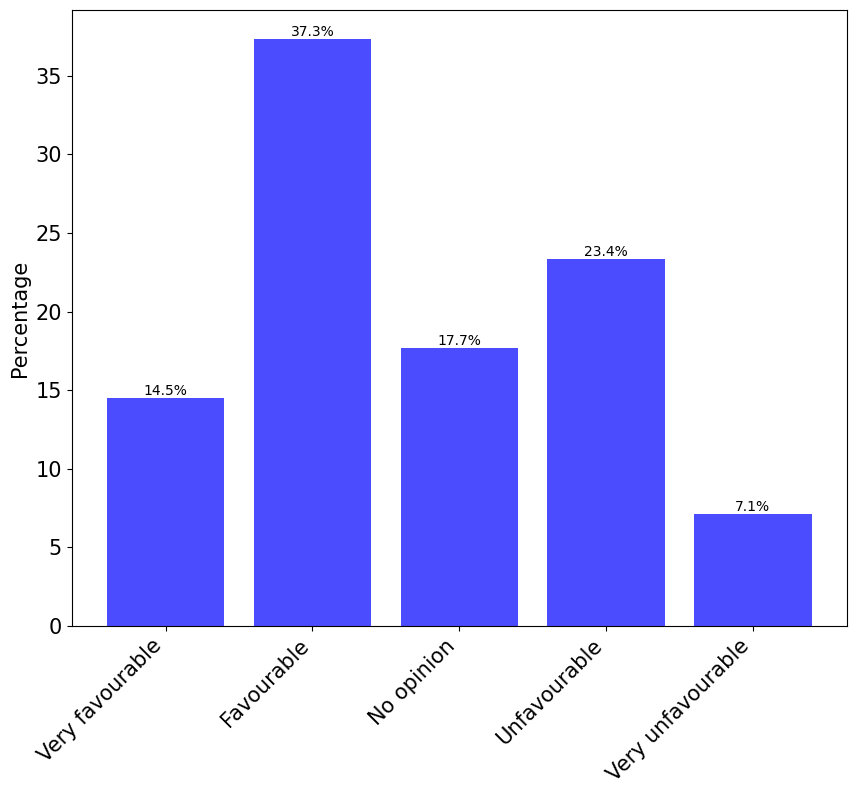

In [286]:
# Percentage
opinion_percentages = (opinion_ordered / total_opinion_count) * 100
plt.figure(figsize=(10, 8))
bars = plt.bar(opinion_percentages.index, opinion_percentages.values, color='blue', alpha=0.7)

plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Adding number of occurrences in plt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)


plt.show()

# Figure 12. CBDC adoption

If you could use the CBDC to know clearly how the state uses every single Euro of your taxes, how would your opinion compare with the previous answer?

In [287]:
more_favourable_adoption = data[changing_opinion_question]
more_favourable_adoption_counts = more_favourable_adoption.value_counts()
more_favourable_adoption_counts

If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?
I would be more favourable    279
My opinion does not change     72
Name: count, dtype: int64

In [288]:
total_adoption_count = more_favourable_adoption_counts.sum()
total_adoption_count

351

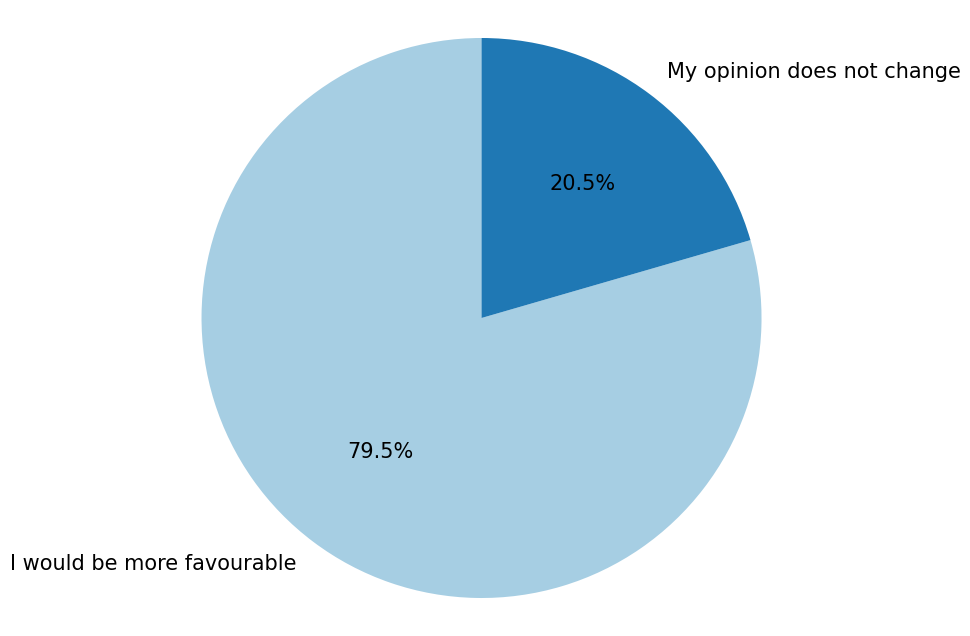

In [289]:
# Pie Chart Percentages
adoption_percentages = (more_favourable_adoption_counts / total_adoption_count) * 100
plt.figure(figsize=(10, 8))
plt.pie(adoption_percentages, labels=adoption_percentages.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')

plt.show()

# Figure 13. Knowledge Digital Euro By Generation

In [290]:
group_digital_euro = data[(data[know_digital_euro_question] == 'Si')]
group_digital_euro_gen = group_digital_euro.groupby(['Gen']).size().reindex(gen_order)
group_digital_euro_gen

Gen
Gen Z                27.0
Gen Y                47.0
Gen X                13.0
Baby boomers          5.0
Silent generation     NaN
dtype: float64

In [291]:
percentage_group_digital_euro_gen = group_digital_euro_gen /generation_count*100
percentage_group_digital_euro_gen_ordered = percentage_group_digital_euro_gen.reindex(gen_order)
percentage_group_digital_euro_gen_ordered

Gen
Gen Z                33.750000
Gen Y                28.834356
Gen X                17.105263
Baby boomers         16.129032
Silent generation          NaN
dtype: float64

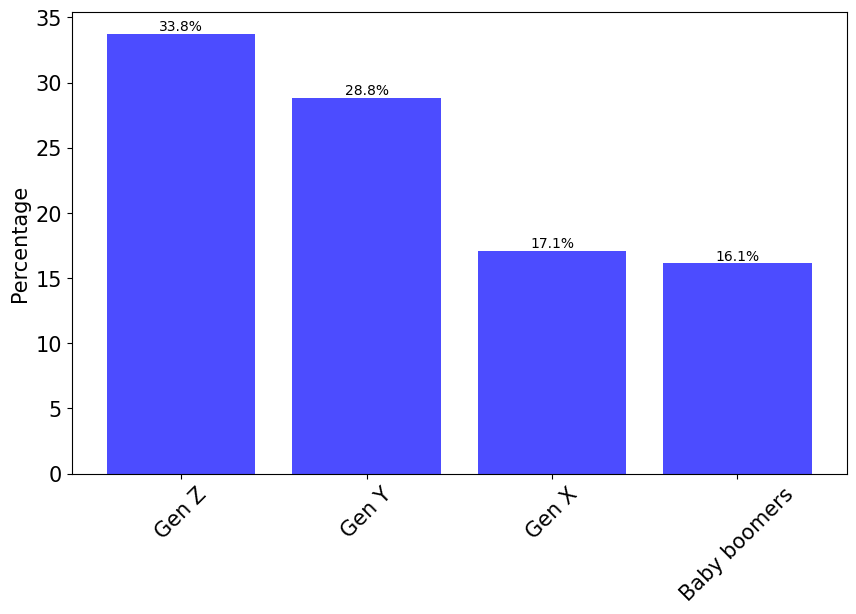

In [292]:
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_group_digital_euro_gen_ordered.index, percentage_group_digital_euro_gen_ordered.values, color='blue', alpha=0.7)

plt.ylabel('Percentage')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

# Figure 14. Knwoledge of Cryptocurrences by Generation

In [293]:
group_crypto_yes = data[data[know_cryptocurrencies_question].isin(['Si'])]
group_crypto_yes_gen = group_crypto_yes.groupby(['Gen']).size().reindex(gen_order)
group_crypto_yes_gen

Gen
Gen Z                 63.0
Gen Y                121.0
Gen X                 49.0
Baby boomers          12.0
Silent generation      NaN
dtype: float64

In [294]:
group_crypto_yes_use = data[data[know_cryptocurrencies_question].isin(['Si e ne posseggo alcune'])]
group_crypto_yes_use_gen = group_crypto_yes_use.groupby(['Gen']).size().reindex(gen_order)
group_crypto_yes_use_gen

Gen
Gen Z                 7.0
Gen Y                24.0
Gen X                 2.0
Baby boomers          NaN
Silent generation     NaN
dtype: float64

In [295]:
# Percentage crypto yes
group_crypto_yes_gen_percentage = group_crypto_yes_gen /generation_count *100
group_crypto_yes_gen_percentage_ordered = group_crypto_yes_gen_percentage.reindex(gen_order)
group_crypto_yes_gen_percentage_ordered

Gen
Gen Z                78.750000
Gen Y                74.233129
Gen X                64.473684
Baby boomers         38.709677
Silent generation          NaN
dtype: float64

In [296]:
# Percentage crypto yes and use
group_crypto_yes_use_gen_percentage = group_crypto_yes_use_gen /generation_count *100
group_crypto_yes_use_gen_percentage_ordered = group_crypto_yes_use_gen_percentage.reindex(gen_order)
group_crypto_yes_use_gen_percentage_ordered

Gen
Gen Z                 8.750000
Gen Y                14.723926
Gen X                 2.631579
Baby boomers               NaN
Silent generation          NaN
dtype: float64

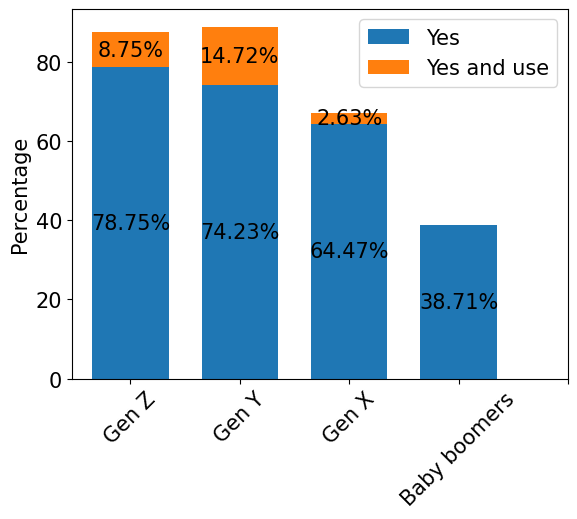

In [347]:
# Stacked bar chart
bar_width = 0.7
index = np.arange(len(gen_order))

fig, ax = plt.subplots()
bars1 = ax.bar(index, group_crypto_yes_gen_percentage_ordered, bar_width, label='Yes')
bars2 = ax.bar(index, group_crypto_yes_use_gen_percentage_ordered, bar_width, bottom=group_crypto_yes_gen_percentage_ordered, label='Yes and use')

ax.set_ylabel('Percentage')
ax.set_xticks(index)
ax.set_xticklabels(gen_order)
plt.xticks(rotation=45)
ax.set_xticks(index)
ax.set_xticklabels([gen if val > 0 else '' for gen, val in zip(gen_order, group_crypto_yes_gen_percentage_ordered)])
ax.legend()


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            y_offset = height / 2 + bar.get_y()
            ax.text(bar.get_x() + bar.get_width() / 2, y_offset, f'{round(height, 2)}%', ha='center', va='center')


plt.show()


# Figure 15. Heatmap citizens and taxes By Generation

In [298]:
data

,Informazioni cronologiche,Gen,Genere,Occupation,Settore,Level,Do you know Digital Euro Project?,Do you know Cryptocurrencies?,How much do you identify with what you just read?,How supportive are you with what you just read?,"If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?","Se potessi sapere chiaramente come lo Stato utilizza ogni singolo euro delle TUE tasse, saresti più d'accordo nel pagare le tasse?",Che tipo di funzionalità ti aspetti da un sistema come questo?,Cosa ti spaventerebbe/quali sono le tue preoccupazioni riguardo l’utilizzo di questo sistema?
0,02/11/2023 8.21.42,Gen Y,Donna,Freelancer,Servizi socio-sanitari,Post-graduate masters,Si,Si,Quite,No opinion,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che le mie informazioni possano esser...
1,02/11/2023 15.31.01,Gen Y,Donna,Freelancer,"Comunicazione, pubblicità e pubbliche relazioni",Bachelor/master degree,Si,Si,Very,Very favourable,My opinion does not change,Si,Permettere anche alle imprese terze di parteci...,Ho paura che la mia privacy venga violata
2,03/11/2023 9.17.37,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Post-graduate masters,Si,Si e ne posseggo alcune,Very,Very favourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che la mia privacy venga violata
3,03/11/2023 9.18.35,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si e ne posseggo alcune,Very,Very favourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,"Ho paura di subire furti di denaro, Ho paura c..."
4,03/11/2023 9.24.59,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si e ne posseggo alcune,Very,Favourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,Ho paura che la mia privacy venga violata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,06/11/2023 22.03.58,Gen X,Uomo,"Employee, worker, attendant",Edilizia ed impiantistica,Bachelor/master degree,No,No,Little,No opinion,My opinion does not change,No,Tracciabilità delle donazioni alle associazion...,Ho paura di poter essere truffato in qualche modo
347,06/11/2023 22.39.47,Gen Y,Donna,Other,"Agricoltura, zootecnia, silvicoltura e pesca",PhD,No,Si,Very,Very unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."
348,06/11/2023 23.25.37,Gen Y,Uomo,Other,Informatica,Bachelor/master degree,No,Si,Very,Unfavourable,My opinion does not change,Si,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."
349,07/11/2023 7.17.53,Gen Y,Uomo,"Employee, worker, attendant",Informatica,High school,No,Si,Quite,Favourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."


In [299]:
# Grouped by Gen
taxes_match_data_gen = data.groupby(["Gen", identify_question]).size().unstack().reindex(gen_order)
taxes_match_data_gen = taxes_match_data_gen[agreement_order]
taxes_match_data_gen

How much do you identify with what you just read?,Very,Quite,Little,Any
Gen,,,,
Gen Z,25.0,48.0,6.0,1.0
Gen Y,80.0,69.0,14.0,NaN
Gen X,28.0,37.0,11.0,NaN
Baby boomers,8.0,16.0,6.0,1.0
Silent generation,NaN,1.0,NaN,NaN


In [300]:
taxes_match_data_gen_transposed = taxes_match_data_gen.transpose()
taxes_match_data_gen_transposed_ordered = taxes_match_data_gen_transposed.reindex(agreement_order)
taxes_match_data_gen_transposed_ordered = taxes_match_data_gen_transposed_ordered[gen_order]
taxes_match_data_gen_transposed_ordered

Gen,Gen Z,Gen Y,Gen X,Baby boomers,Silent generation
How much do you identify with what you just read?,,,,,
Very,25.0,80.0,28.0,8.0,NaN
Quite,48.0,69.0,37.0,16.0,1.0
Little,6.0,14.0,11.0,6.0,NaN
Any,1.0,NaN,NaN,1.0,NaN


In [301]:
taxes_match_data_gen_transposed_ordered.sum().sum()

351.0

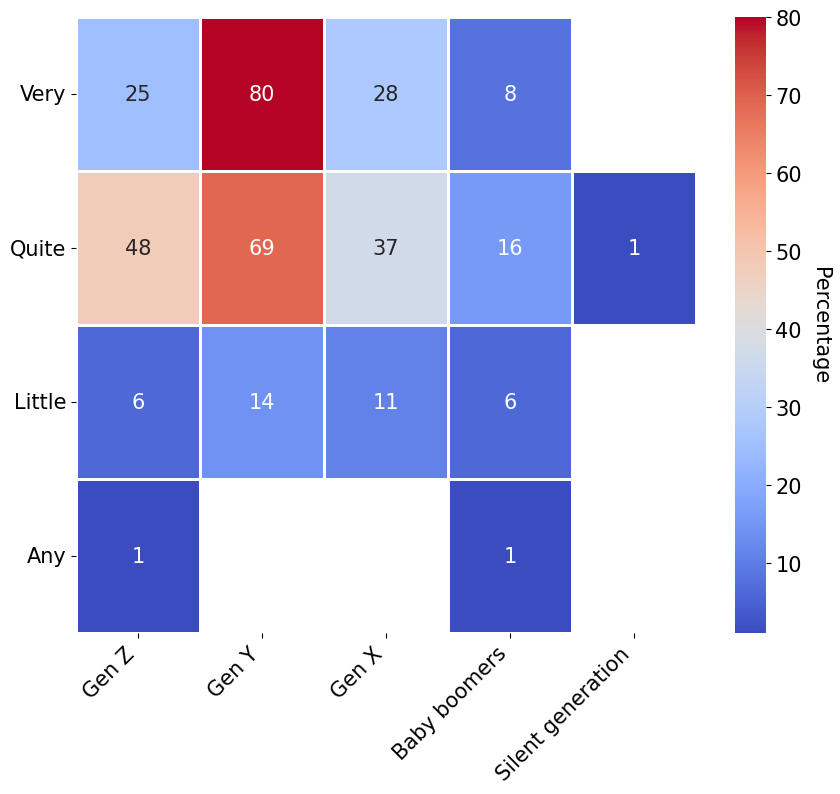

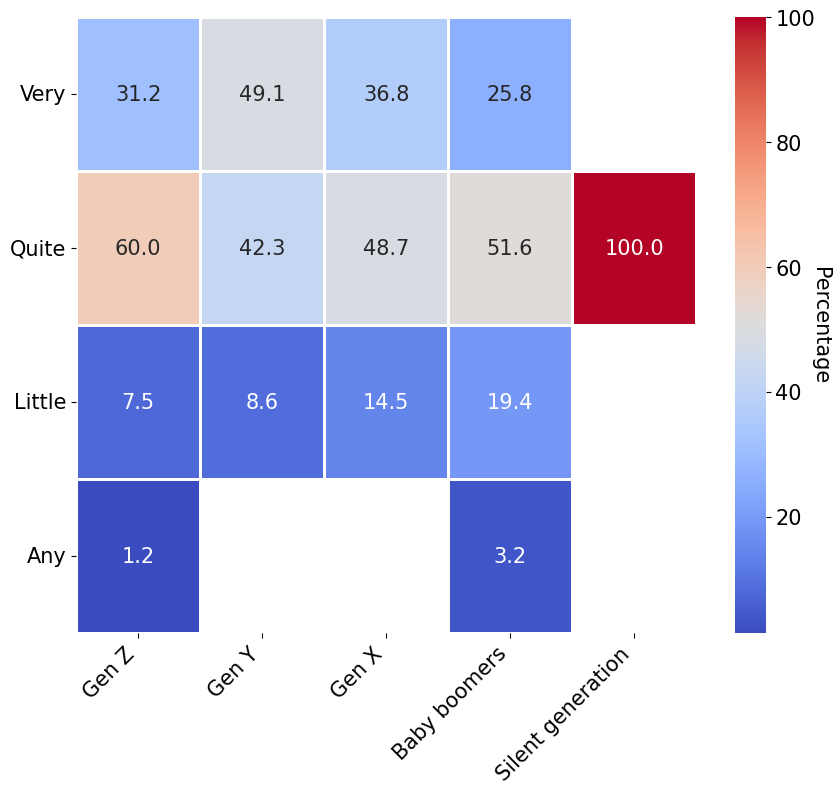

In [302]:
# Heatmap
# Plot heatmap for Gen
plt.figure(figsize=(10, 8))
ax = sns.heatmap(taxes_match_data_gen_transposed_ordered, annot=True, fmt="g", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)

ax.set_ylabel('')
ax.set_xlabel('')
plt.show()


# Plot heatmap percentage for Gen
percentage_tax_match = (taxes_match_data_gen_transposed_ordered / generation_count * 100)
percentage_tax_match = percentage_tax_match[gen_order]

plt.figure(figsize=(10, 8))
ax = sns.heatmap(percentage_tax_match, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

# Figure 16. CBDC adoption By Generation

In [303]:
more_favourable_adoption_gen = data.groupby(['Gen', changing_opinion_question]).size().unstack().reindex(gen_order)
more_favourable_adoption_gen

"If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?",I would be more favourable,My opinion does not change
Gen,,
Gen Z,69.0,11.0
Gen Y,130.0,33.0
Gen X,55.0,21.0
Baby boomers,24.0,7.0
Silent generation,1.0,NaN


In [304]:
more_favourable_adoption_gen.sum().sum()

351.0

In [305]:
adoption_gen_transposed = more_favourable_adoption_gen.transpose()
adoption_gen_transposed_ordered = adoption_gen_transposed.reindex(adoption_order)
adoption_gen_transposed_ordered = adoption_gen_transposed_ordered[gen_order]
adoption_gen_transposed_ordered

Gen,Gen Z,Gen Y,Gen X,Baby boomers,Silent generation
"If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?",,,,,
I would be more favourable,69.0,130.0,55.0,24.0,1.0
My opinion does not change,11.0,33.0,21.0,7.0,NaN


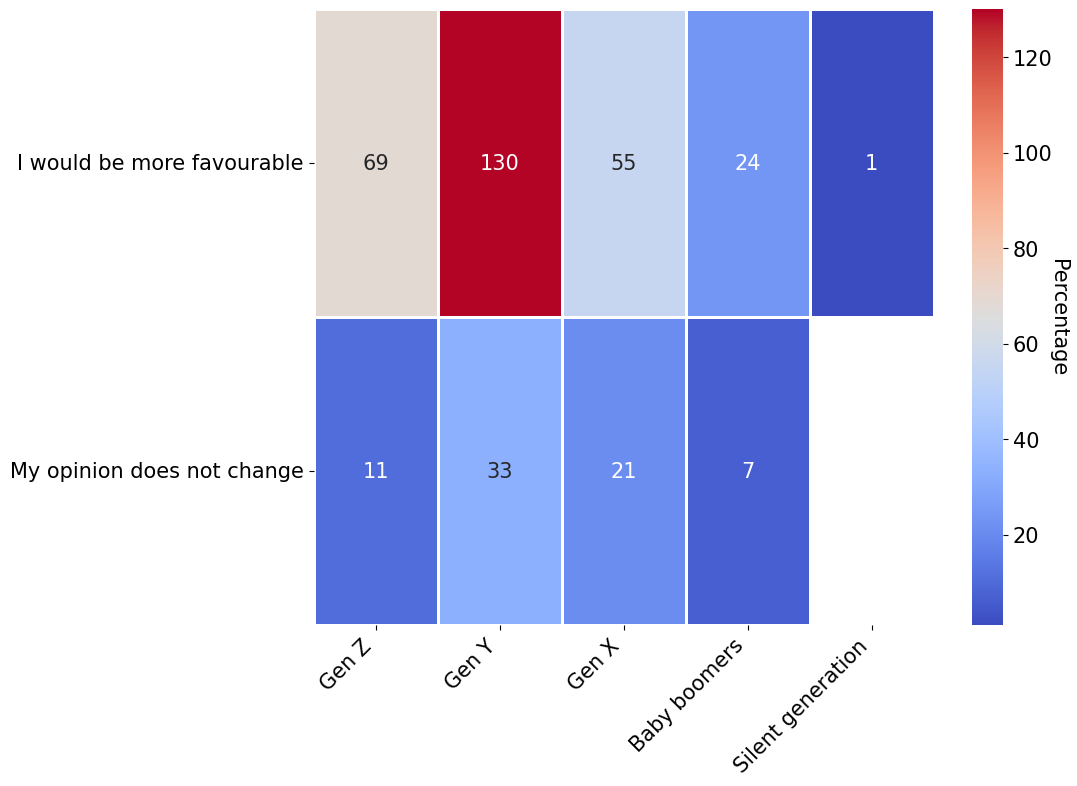

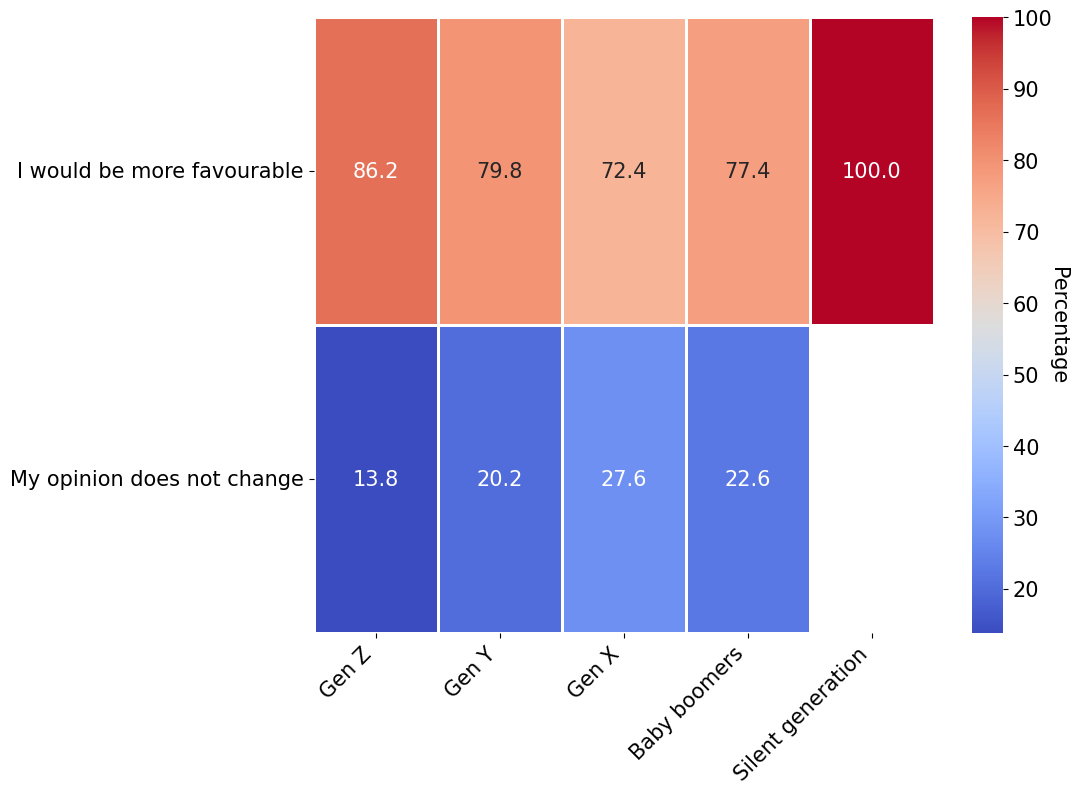

In [306]:
# Heatmap
# Plot heatmap for Gen
plt.figure(figsize=(10, 8))
ax = sns.heatmap(adoption_gen_transposed_ordered, annot=True, fmt="g", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)

ax.set_ylabel('')
ax.set_xlabel('')
plt.show()


# Plot heatmap percentage for Gen
percentage_adoption_gen = (adoption_gen_transposed_ordered / generation_count * 100)
percentage_adoption_gen = percentage_adoption_gen[gen_order]


plt.figure(figsize=(10, 8))
ax = sns.heatmap(percentage_adoption_gen, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

# Defining changing opinion data from Unfavorable data

In [307]:
# Define changing opinion data
favorable_change_data = unfavorable_data[unfavorable_data[changing_opinion_question] == "I would be more favourable"]

changing_opinion_counts_gen_occ = favorable_change_data.groupby(["Gen", "Occupation"]).size().reset_index(name='Number of Unfavorable which change opinion')
changing_opinion_counts_gen_lev = favorable_change_data.groupby(["Gen", "Level"]).size().reset_index(name='Number of Unfavorable which change opinion')

# Reorder
changing_opinion_counts_gen_occ = favorable_change_data.groupby(["Gen", "Occupation"]).size().unstack().fillna(0).reindex(gen_order)
changing_opinion_counts_gen_occ = changing_opinion_counts_gen_occ[occ_order]

changing_opinion_counts_gen_lev = favorable_change_data.groupby(["Gen", "Level"]).size().unstack().fillna(0).reindex(gen_order)
changing_opinion_counts_gen_lev = changing_opinion_counts_gen_lev[lev_order]

In [308]:
favorable_change_data

,Informazioni cronologiche,Gen,Genere,Occupation,Settore,Level,Do you know Digital Euro Project?,Do you know Cryptocurrencies?,How much do you identify with what you just read?,How supportive are you with what you just read?,"If you could use the CBDC to know clearly how the State uses every single Euro of your taxes, how would your opinion compare with the previous answer?","Se potessi sapere chiaramente come lo Stato utilizza ogni singolo euro delle TUE tasse, saresti più d'accordo nel pagare le tasse?",Che tipo di funzionalità ti aspetti da un sistema come questo?,Cosa ti spaventerebbe/quali sono le tue preoccupazioni riguardo l’utilizzo di questo sistema?
7,03/11/2023 9.28.59,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si,Very,Unfavourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura di poter essere truffato in qualche modo
8,03/11/2023 9.30.04,Gen Y,Donna,"Employee, worker, attendant",Informatica,Bachelor/master degree,No,Si,Very,Unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,Ho paura che le mie informazioni possano esser...
15,03/11/2023 9.50.14,Gen Y,Uomo,"Employee, worker, attendant",Informatica,Bachelor/master degree,Si,Si,Very,Unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,Nessuna
16,03/11/2023 10.22.55,Gen Y,Uomo,"Employee, worker, attendant",Produzioni metalmeccaniche,Bachelor/master degree,No,Si,Quite,Very unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,Ho paura che le mie informazioni possano esser...
30,03/11/2023 10.57.55,Gen Y,Uomo,Freelancer,Informatica,PhD,Si,Si,Very,Unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,Ho paura che le mie informazioni possano esser...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,05/11/2023 20.37.11,Gen Y,Donna,Teacher,Educazione e formazione,Bachelor/master degree,No,No,Quite,Unfavourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura di poter essere truffato in qualche modo
340,06/11/2023 14.23.27,Silent generation,Donna,Retired,Pensionata,Middle school,No,No,Quite,Unfavourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che le mie informazioni possano esser...
345,06/11/2023 20.03.23,Gen X,Donna,Unemployed,"Ambiente, ecologia e sicurezza ambientale",High school,No,Si,Quite,Unfavourable,I would be more favourable,Si,Tracciare a livello locale come vengono spese ...,Ho paura che la mia privacy venga violata
347,06/11/2023 22.39.47,Gen Y,Donna,Other,"Agricoltura, zootecnia, silvicoltura e pesca",PhD,No,Si,Very,Very unfavourable,I would be more favourable,Un po' di più,Tracciare a livello locale come vengono spese ...,"Ho paura che la mia privacy venga violata, Ho ..."


In [309]:
unfavorable_counts_gen_occ

Occupation,Student,Teacher,"Employee, worker, attendant",Freelancer,Executive,Administrator,Retired,Unemployed,Other
Gen,,,,,,,,,
Gen Z,16.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN
Gen Y,2.0,2.0,30.0,12.0,3.0,1.0,NaN,2.0,2.0
Gen X,NaN,6.0,4.0,4.0,2.0,1.0,NaN,4.0,NaN
Baby boomers,NaN,1.0,3.0,NaN,NaN,NaN,3.0,3.0,NaN
Silent generation,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [310]:
changing_opinion_counts_gen_occ

Occupation,Student,Teacher,"Employee, worker, attendant",Freelancer,Executive,Administrator,Retired,Unemployed,Other
Gen,,,,,,,,,
Gen Z,15.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
Gen Y,2.0,2.0,23.0,8.0,1.0,0.0,0.0,2.0,1.0
Gen X,0.0,4.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0
Baby boomers,0.0,1.0,2.0,0.0,0.0,0.0,3.0,3.0,0.0
Silent generation,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [311]:
unfavorable_counts_gen_occ

Occupation,Student,Teacher,"Employee, worker, attendant",Freelancer,Executive,Administrator,Retired,Unemployed,Other
Gen,,,,,,,,,
Gen Z,16.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN
Gen Y,2.0,2.0,30.0,12.0,3.0,1.0,NaN,2.0,2.0
Gen X,NaN,6.0,4.0,4.0,2.0,1.0,NaN,4.0,NaN
Baby boomers,NaN,1.0,3.0,NaN,NaN,NaN,3.0,3.0,NaN
Silent generation,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


# Figure 17. Attitude change

In [312]:
# Only Unfavorable responses
only_unfavorable_data= data[data[supportive_question].isin(["Unfavourable"])]
only_unfavorable_data_counts = len(only_unfavorable_data)
print("Number of Only Unfavorable responses:", only_unfavorable_data_counts)

# Only Very Unfavorable responses
only_very_unfavorable_data= data[data[supportive_question].isin(["Very unfavourable"])]
only_very_unfavorable_data_counts = len(only_very_unfavorable_data)
print("Number of Only Very Unfavorable responses:", only_very_unfavorable_data_counts)

# Define only Unfavorable by Gen Dataframe
only_unfavorable_data_gen = only_unfavorable_data.groupby(["Gen"]).size().reindex(gen_order)

# Define only Very Unfavorable by Gen Dataframe
only_very_unfavorable_data_gen = only_very_unfavorable_data.groupby(["Gen"]).size().reindex(gen_order)


Number of Only Unfavorable responses: 82
Number of Only Very Unfavorable responses: 25


In [313]:
only_unfavorable_data_gen

Gen
Gen Z                15
Gen Y                42
Gen X                17
Baby boomers          7
Silent generation     1
dtype: int64

In [314]:
only_very_unfavorable_data_gen

Gen
Gen Z                 6.0
Gen Y                12.0
Gen X                 4.0
Baby boomers          3.0
Silent generation     NaN
dtype: float64

In [315]:
# Additude change only Unfavorable responses
only_unfavorable_change_data = only_unfavorable_data[only_unfavorable_data[changing_opinion_question] == "I would be more favourable"]

# Additude change only Very Unfavorable responses
only_very_unfavorable_change_data = only_very_unfavorable_data[only_very_unfavorable_data[changing_opinion_question] == "I would be more favourable"]

In [316]:
only_unfavorable_change_data_counts = len(only_unfavorable_change_data)
print("Number of Only Unfavorable responses which change opinion:", only_unfavorable_change_data_counts)

Number of Only Unfavorable responses which change opinion: 60


In [317]:
only_very_unfavorable_change_data_counts = len(only_very_unfavorable_change_data)
print("Number of Only Very Unfavorable responses which change opinion:", only_very_unfavorable_change_data_counts)

Number of Only Very Unfavorable responses which change opinion: 19


In [318]:
# Additude change only Unfavorable responses
only_unfavorable_change_data_gen=only_unfavorable_change_data.groupby(["Gen"]).size().reindex(gen_order)
only_unfavorable_change_data_gen

Gen
Gen Z                13
Gen Y                30
Gen X                10
Baby boomers          6
Silent generation     1
dtype: int64

In [319]:
# Additude change only Unfavorable responces percentage
percentage_attitude_unfavorable = (only_unfavorable_change_data_gen / only_unfavorable_data_gen * 100)

percentage_attitude_unfavorable

Gen
Gen Z                 86.666667
Gen Y                 71.428571
Gen X                 58.823529
Baby boomers          85.714286
Silent generation    100.000000
dtype: float64

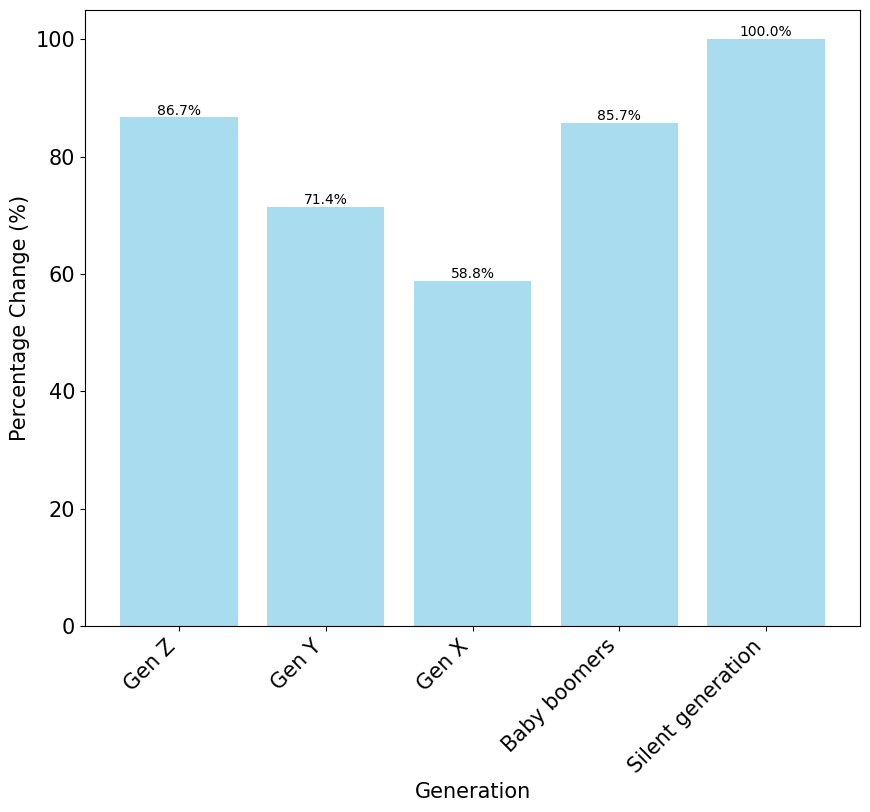

In [320]:
# Percentage of Attitude Change among Unfavorable Responses by Generation
plt.figure(figsize=(10, 8))
bars = plt.bar(percentage_attitude_unfavorable.index, percentage_attitude_unfavorable.values, color='skyblue', alpha=0.7)

plt.xlabel('Generation')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [321]:
only_very_unfavorable_data_gen

Gen
Gen Z                 6.0
Gen Y                12.0
Gen X                 4.0
Baby boomers          3.0
Silent generation     NaN
dtype: float64

In [322]:
# Additude change only Very Unfavorable responses
only_very_unfavorable_change_data_gen=only_very_unfavorable_change_data.groupby(["Gen"]).size().reindex(gen_order)
only_very_unfavorable_change_data_gen

Gen
Gen Z                6.0
Gen Y                9.0
Gen X                1.0
Baby boomers         3.0
Silent generation    NaN
dtype: float64

In [323]:
# Additude change only Very Unfavorable responces percentage

percentage_attitude_very_unfavorable = (only_very_unfavorable_change_data_gen / only_very_unfavorable_data_gen * 100)
percentage_attitude_very_unfavorable

Gen
Gen Z                100.0
Gen Y                 75.0
Gen X                 25.0
Baby boomers         100.0
Silent generation      NaN
dtype: float64

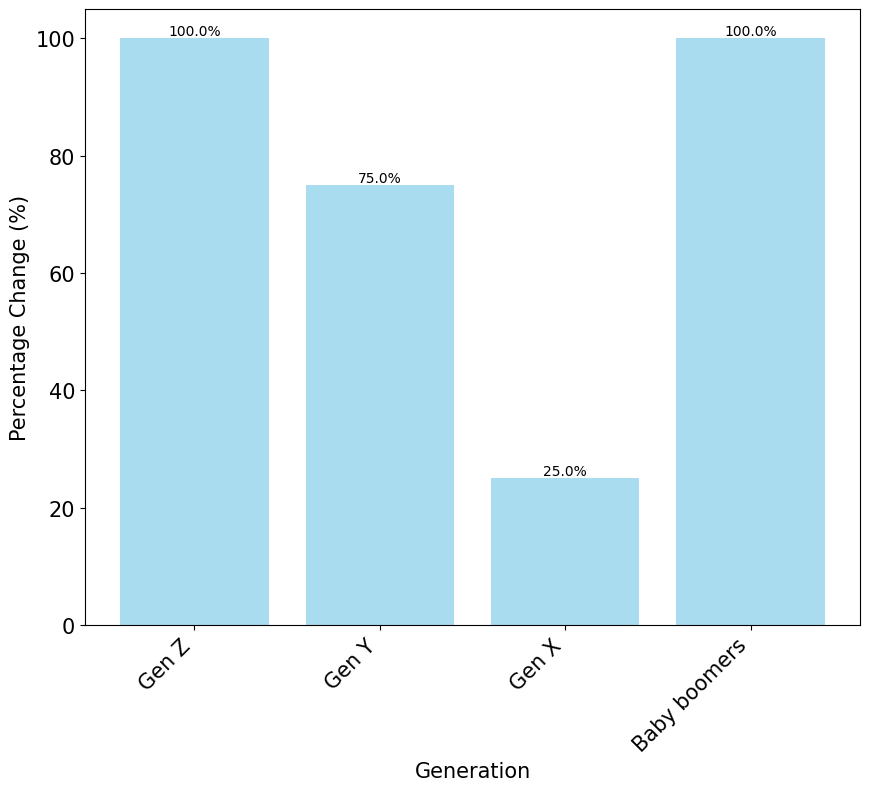

In [324]:
# Percentage of Attitude Change among Very Unfavorable Responses by Generation
plt.figure(figsize=(10, 8))
bars = plt.bar(percentage_attitude_very_unfavorable.index, percentage_attitude_very_unfavorable.values, color='skyblue', alpha=0.7)

plt.xlabel('Generation')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

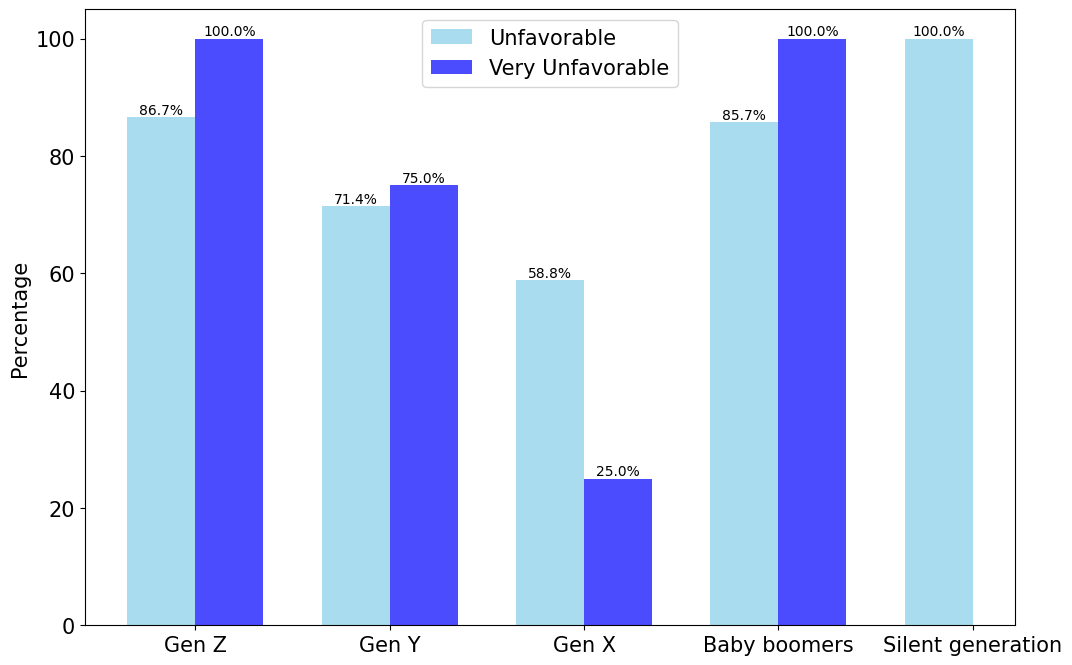

In [325]:
# Percentage of Attitude Change among Unfavorable and Very Unfavorable Responses by Generation
bar_width = 0.35
index = np.arange(len(percentage_attitude_unfavorable))

plt.figure(figsize=(12, 8))


bars1 = plt.bar(index - bar_width/2, percentage_attitude_unfavorable.values, bar_width, label='Unfavorable', color='skyblue', alpha=0.7)


bars2 = plt.bar(index + bar_width/2, percentage_attitude_very_unfavorable.values, bar_width, label='Very Unfavorable', color='blue', alpha=0.7)

plt.ylabel('Percentage')
plt.xticks(index, percentage_attitude_unfavorable.index)
plt.legend()

# Aggiungere i numeri sopra le barre
for bars in (bars1, bars2):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

# Mostra il grafico
plt.show()

# Figure 18. Heatmap changing opinion By Generation and Occupation

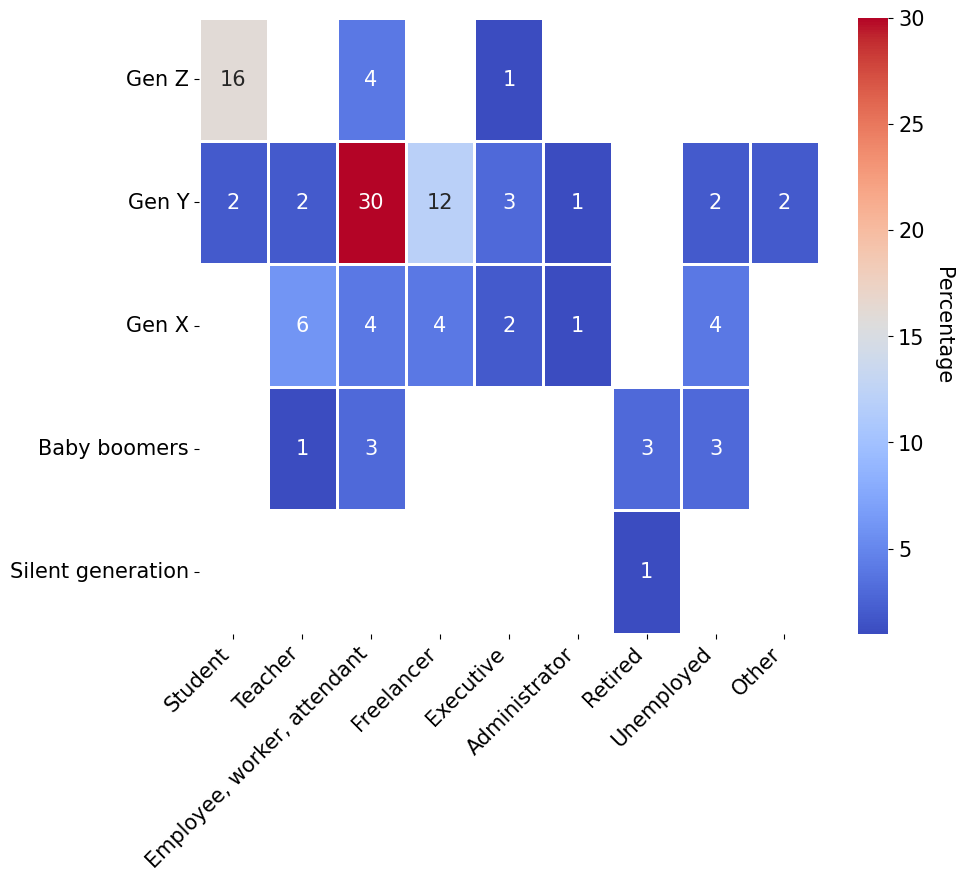

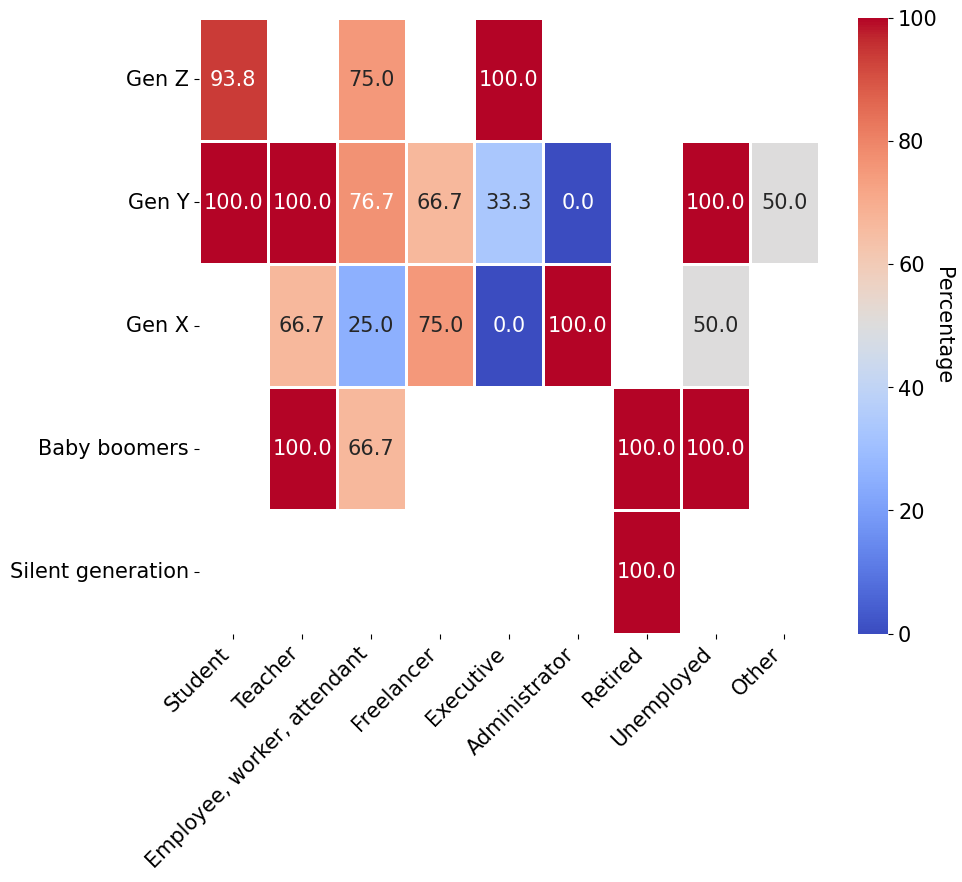

In [326]:
# Heatmap
# Plot heatmap for Occupation
plt.figure(figsize=(10, 8))
ax = sns.heatmap(unfavorable_counts_gen_occ, annot=True, fmt="g", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()


# Plot heatmap percentage for Occupation
percentage_changing_occ = (changing_opinion_counts_gen_occ / unfavorable_counts_gen_occ * 100)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(percentage_changing_occ, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

In [327]:
percentage_changing_occ

Occupation,Student,Teacher,"Employee, worker, attendant",Freelancer,Executive,Administrator,Retired,Unemployed,Other
Gen,,,,,,,,,
Gen Z,93.75,NaN,75.000000,NaN,100.000000,NaN,NaN,NaN,NaN
Gen Y,100.00,100.000000,76.666667,66.666667,33.333333,0.0,NaN,100.0,50.0
Gen X,NaN,66.666667,25.000000,75.000000,0.000000,100.0,NaN,50.0,NaN
Baby boomers,NaN,100.000000,66.666667,NaN,NaN,NaN,100.0,100.0,NaN
Silent generation,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN


# Figure 19. Heatmap changing opinion By Generation and Level

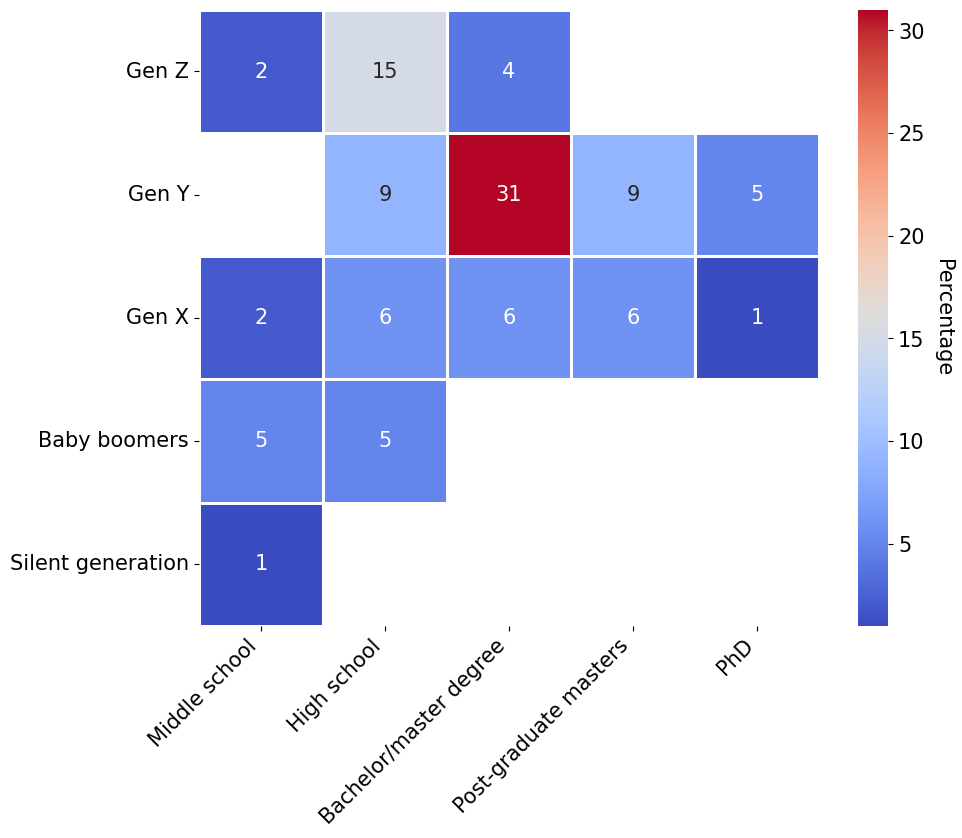

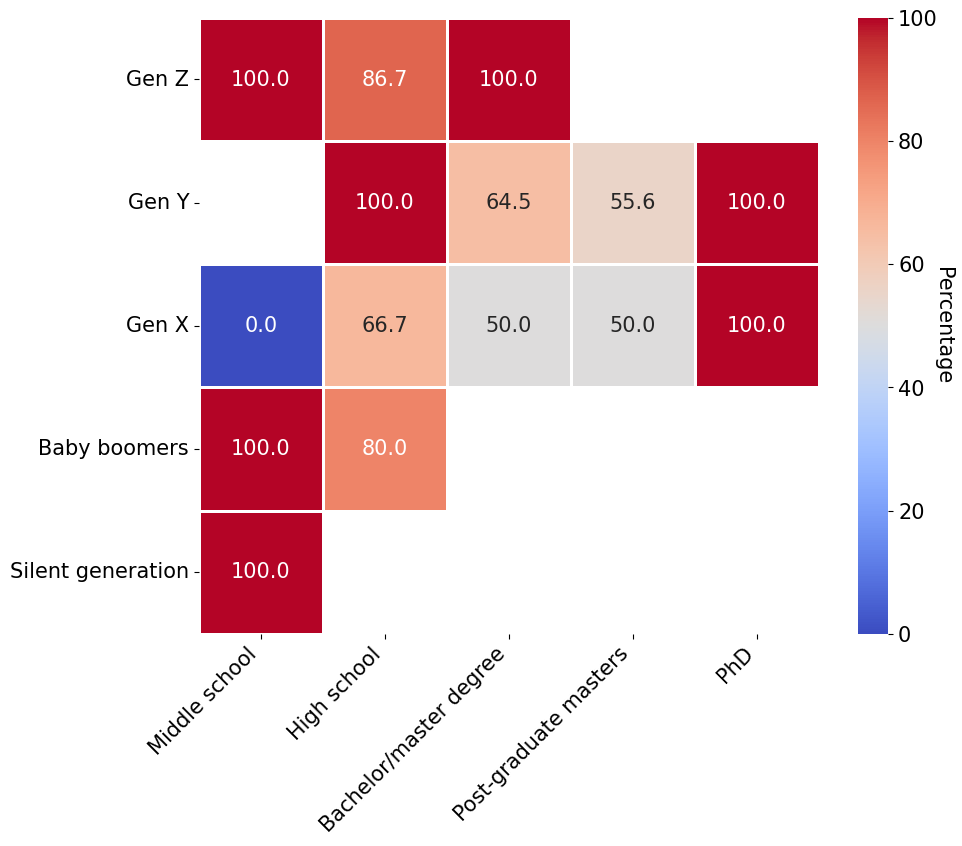

In [328]:
# Heatmap
# Plot heatmap for Level
plt.figure(figsize=(10, 8))
ax = sns.heatmap(unfavorable_counts_gen_lev, annot=True, fmt="g", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()


# Plot heatmap percentage for Level
percentage_changing_lev = (changing_opinion_counts_gen_lev / unfavorable_counts_gen_lev * 100)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(percentage_changing_lev, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

# Figure 20. Heatmap changing opinion between Neutrals By Generation and Occupation

In [329]:
# Define changing opinion data
no_opinion_change_data = no_opinion_data[no_opinion_data[changing_opinion_question] == "I would be more favourable"]

changing_opinion_counts_gen_occ = no_opinion_change_data.groupby(["Gen", "Occupation"]).size().reset_index(name='Number of No Opinion which change opinion')
changing_opinion_counts_gen_lev = no_opinion_change_data.groupby(["Gen", "Level"]).size().reset_index(name='Number of No Opinion which change opinion')

# Reorder
changing_opinion_counts_gen_occ = no_opinion_change_data.groupby(["Gen", "Occupation"]).size().unstack().fillna(0).reindex(gen_order)
changing_opinion_counts_gen_occ = changing_opinion_counts_gen_occ[occ_order]

changing_opinion_counts_gen_lev = no_opinion_change_data.groupby(["Gen", "Level"]).size().unstack().fillna(0).reindex(gen_order)
changing_opinion_counts_gen_lev = changing_opinion_counts_gen_lev[lev_order]

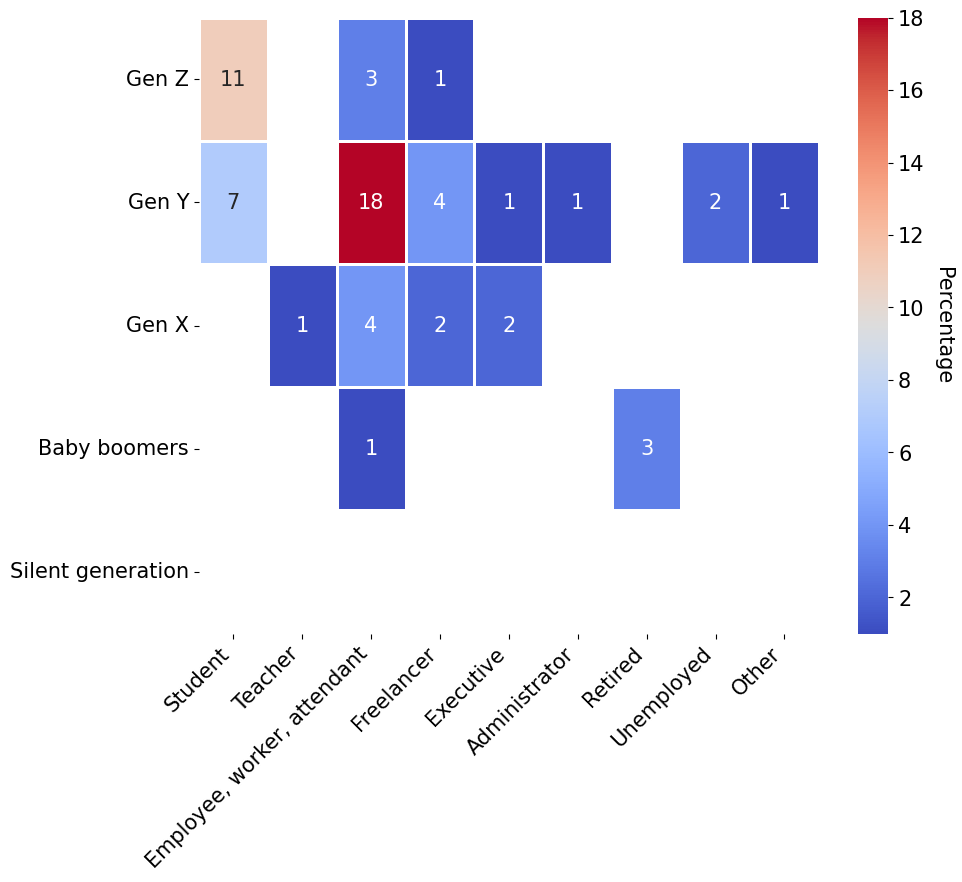

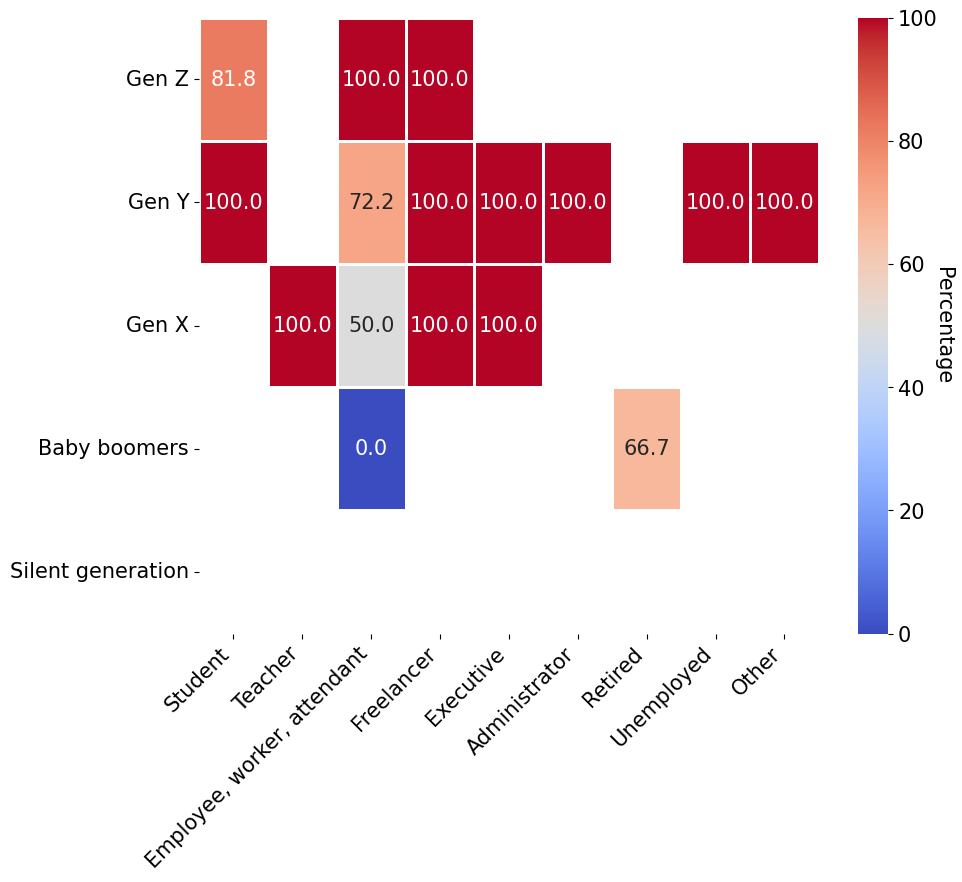

In [330]:
# Heatmap
# Plot heatmap for Occupation
plt.figure(figsize=(10, 8))
ax = sns.heatmap(no_opinion_counts_gen_occ, annot=True, fmt="g", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()


# Plot heatmap percentage for Occupation
percentage_changing_occ = (changing_opinion_counts_gen_occ / no_opinion_counts_gen_occ * 100)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(percentage_changing_occ, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

# Figure 21. Heatmap changing opinion between Neutrals By Generation and Level

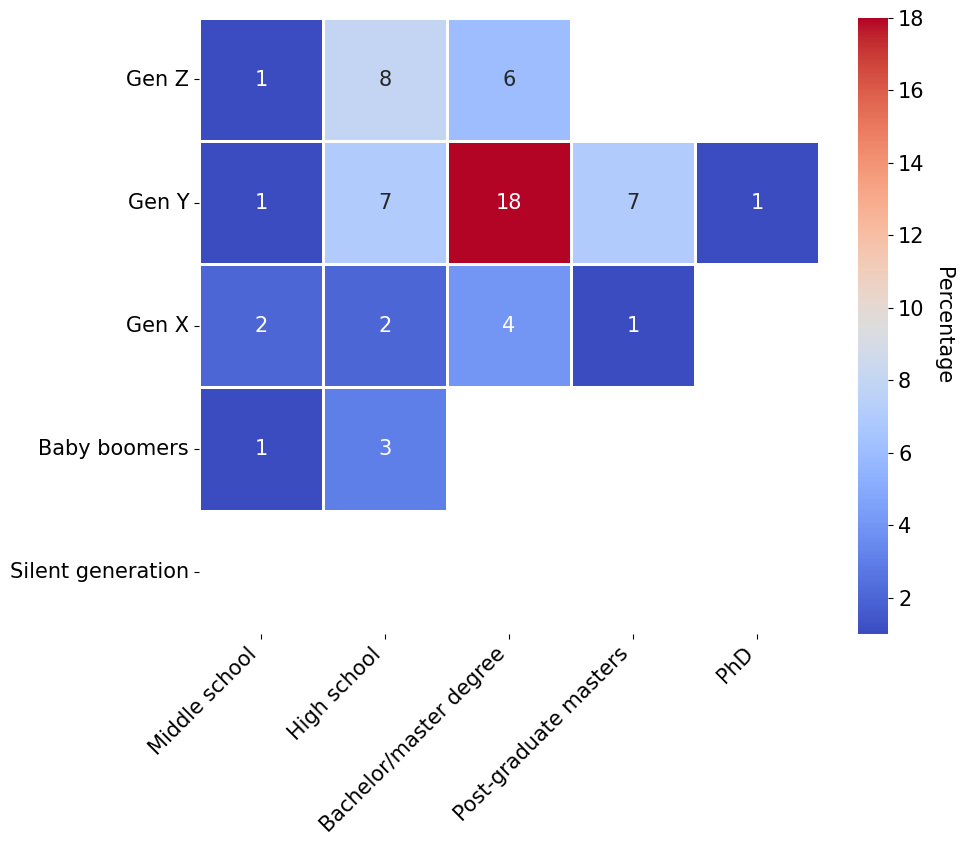

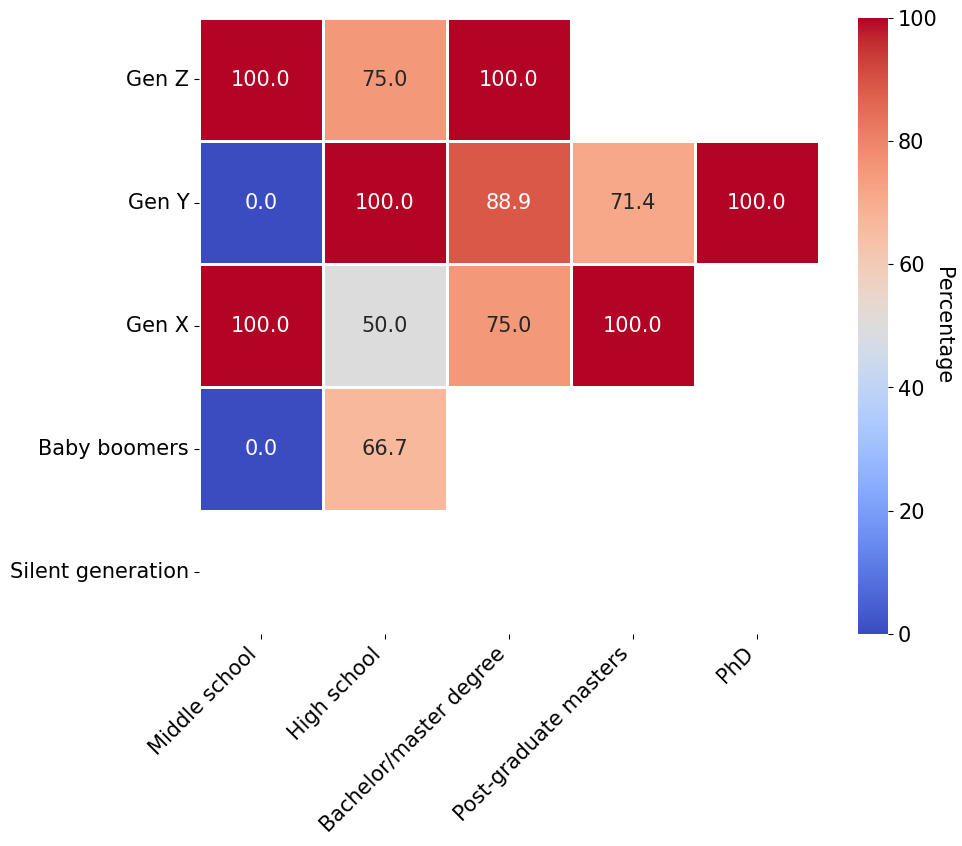

In [331]:
# Heatmap
# Plot heatmap for Level
plt.figure(figsize=(10, 8))
ax = sns.heatmap(no_opinion_counts_gen_lev, annot=True, fmt="g", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()


# Plot heatmap percentage for Level
percentage_changing_lev = (changing_opinion_counts_gen_lev / no_opinion_counts_gen_lev) * 100

plt.figure(figsize=(10, 8))
ax = sns.heatmap(percentage_changing_lev, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.text(x=1.2, y=0.5, s='Percentage', rotation=270, ha='center', va='center', transform=ax.transAxes)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

# Abstract & Discussion percetange

In [332]:
total_taxes_match_data= data[identify_question]

total_responses_counts = total_taxes_match_data.value_counts()
total_responses_counts_ordered= total_responses_counts.reindex(agreement_order)
total_responses_counts_ordered

How much do you identify with what you just read?
Very      141
Quite     171
Little     37
Any         2
Name: count, dtype: int64

In [333]:
sum_very_quite = total_responses_counts_ordered['Very'] + total_responses_counts_ordered['Quite']

print("Percentage of poor match between taxes amount and perceived benefits: ", round(sum_very_quite/total*100,2))

Percentage of poor match between taxes amount and perceived benefits:  88.89


In [334]:
total_sharing_info_data = data[supportive_question].value_counts()
total_sharing_info_data

How supportive are you with what you just read?
Favourable           131
Unfavourable          82
No opinion            62
Very favourable       51
Very unfavourable     25
Name: count, dtype: int64

In [335]:
sum_favourable_very_unfavourable = total_sharing_info_data['Unfavourable'] + total_sharing_info_data['Very unfavourable']
print("Percentage of unfavorable CBDC: ", round(sum_favourable_very_unfavourable/total*100,2))

Percentage of unfavorable CBDC:  30.48


In [336]:
no_opinion_percentage = total_sharing_info_data['No opinion']
print("Percentage of No opinion: ", round(no_opinion_percentage/total*100,2))

Percentage of No opinion:  17.66


In [337]:
total_changing_opinion = data[data[changing_opinion_question] == "I would be more favourable"]
print("Percentage of more favourable CBDC: ", round(len(total_changing_opinion)/total*100,2))

Percentage of more favourable CBDC:  79.49


In [338]:
total_unfavorable_data = data[data[supportive_question].isin(["Unfavourable", "Very unfavourable"])]
len(total_unfavorable_data)

107

In [339]:
total_changing_opinion_in_total_unfavorable = total_unfavorable_data[total_unfavorable_data[changing_opinion_question] == "I would be more favourable"]

len(total_changing_opinion_in_total_unfavorable)

79

In [340]:
print("Percentage of conversion rate unfavourable to favourable of CBDC: ", round(len(total_changing_opinion_in_total_unfavorable)/len(total_unfavorable_data)*100,2))

Percentage of conversion rate unfavourable to favourable of CBDC:  73.83
